## Context
Hand gesture recognition database is presented, composed by a set of near infrared images acquired by the Leap Motion sensor.

## Content
The database is composed by 10 different hand-gestures that were performed by 10 different subjects (5 men and 5 women).

In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np
import keras.backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from sklearn.datasets import make_multilabel_classification
# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [2]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50

# paths for dataset
data_path = "../input/leapgestrecog/leapGestRecog"

## The Data

In [3]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[4, 5, 7, ..., 4, 3, 4],
        [6, 6, 6, ..., 4, 4, 3],
        [5, 6, 6, ..., 5, 4, 4],
        ...,
        [6, 6, 6, ..., 5, 6, 4],
        [6, 5, 5, ..., 5, 6, 4],
        [4, 6, 6, ..., 5, 4, 5]], dtype=uint8),
 0]

In [4]:
# shuffle the input data
import random
random.shuffle(image_data)

In [5]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)
input_data[:5]

[array([[ 5,  4,  5, ...,  3,  4,  5],
        [ 5,  5,  5, ...,  3,  4,  5],
        [ 5,  5,  5, ...,  3,  4,  3],
        ...,
        [ 9,  9, 11, ...,  4,  3,  4],
        [ 9,  9, 11, ...,  4,  4,  3],
        [ 9,  7, 10, ...,  3,  4,  4]], dtype=uint8),
 array([[5, 5, 5, ..., 5, 5, 4],
        [5, 5, 5, ..., 4, 5, 4],
        [5, 5, 6, ..., 5, 5, 4],
        ...,
        [5, 5, 6, ..., 6, 6, 6],
        [3, 5, 7, ..., 5, 6, 5],
        [5, 6, 7, ..., 5, 5, 4]], dtype=uint8),
 array([[ 5,  5,  4, ...,  3,  4,  4],
        [ 4,  4,  5, ...,  3,  3,  3],
        [ 4,  5,  4, ...,  3,  4,  2],
        ...,
        [ 8,  9, 11, ...,  3,  4,  4],
        [ 6,  8, 10, ...,  4,  4,  3],
        [ 8,  8,  9, ...,  4,  4,  4]], dtype=uint8),
 array([[4, 4, 5, ..., 4, 3, 3],
        [6, 5, 5, ..., 4, 4, 3],
        [4, 4, 6, ..., 4, 3, 4],
        ...,
        [5, 5, 4, ..., 4, 4, 4],
        [4, 5, 5, ..., 4, 3, 5],
        [4, 3, 5, ..., 3, 4, 4]], dtype=uint8),
 array([[4, 4, 5, ..., 4

In [6]:
label[:10]

[5, 2, 8, 2, 0, 4, 5, 0, 9, 2]

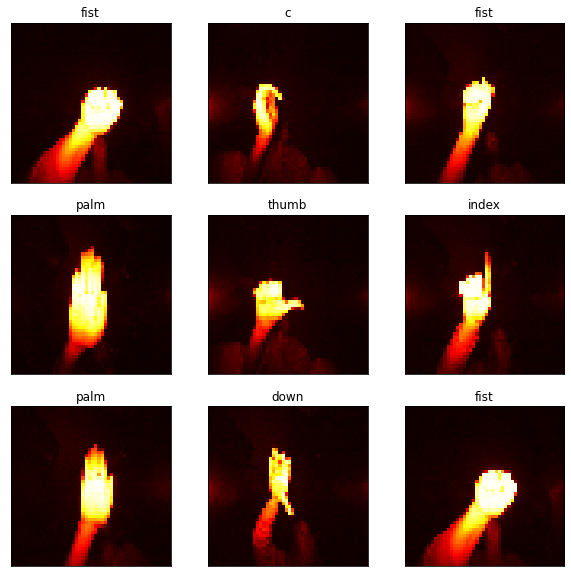

In [7]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
#plt.show()

In [8]:
# Normalizing the data
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape

(20000, 50, 50)

# **Making multibalbel classifier**

In [9]:
from sklearn.datasets import make_multilabel_classification
X,y=make_multilabel_classification(n_samples=500,n_features=4,n_classes=2,n_labels=3,random_state=1)
X

array([[ 9., 12.,  6., 12.],
       [ 5.,  2., 12., 22.],
       [15.,  5., 12., 11.],
       ...,
       [ 5., 10., 15., 28.],
       [ 0.,  8., 16., 27.],
       [ 6.,  9., 13., 22.]])

In [10]:
y

array([[0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [1, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 0],
       [1, 1],
       [0, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1,

<function matplotlib.pyplot.show(*args, **kw)>

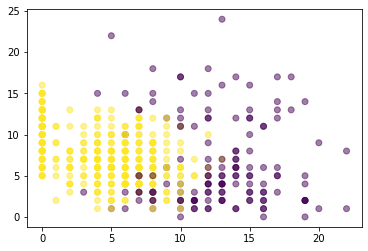

In [11]:
rng=np.random.RandomState(1)
colors=rng.rand(1000)
plt.scatter(X[:,0:1],X[:,1:2],c=y[:,0],alpha=0.5,cmap='viridis')
plt.show

# **Normalise**

In [12]:
X=(X-X.min())/(X.max()-X.min())
X

array([[0.20454545, 0.27272727, 0.13636364, 0.27272727],
       [0.11363636, 0.04545455, 0.27272727, 0.5       ],
       [0.34090909, 0.11363636, 0.27272727, 0.25      ],
       ...,
       [0.11363636, 0.22727273, 0.34090909, 0.63636364],
       [0.        , 0.18181818, 0.36363636, 0.61363636],
       [0.13636364, 0.20454545, 0.29545455, 0.5       ]])

In [13]:
# one hot encoding
label = keras.utils.to_categorical(label, num_classes=10,dtype='i1')
label[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)

In [14]:
# reshaping the data
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

# **Splitting the input_data to train and test data**

In [15]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.10, random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((18000, 50, 50, 1), (18000, 10), (2000, 50, 50, 1), (2000, 10))

## The Model

In [16]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))

model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
         optimizer = 'rmsprop',
         metrics = ['accuracy'])
    

In [17]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Train on 18000 samples, validate on 2000 samples
Epoch 1/7
18000/18000 [==============================] - 6s 336us/step - loss: 0.2726 - accuracy: 0.9124 - val_loss: 0.1803 - val_accuracy: 0.9460
Epoch 2/7
18000/18000 [==============================] - 3s 175us/step - loss: 0.0141 - accuracy: 0.9957 - val_loss: 7.9288e-04 - val_accuracy: 0.9995
Epoch 3/7
18000/18000 [==============================] - 3s 179us/step - loss: 0.0090 - accuracy: 0.9979 - val_loss: 0.0028 - val_accuracy: 0.9990
Epoch 4/7
18000/18000 [==============================] - 3s 179us/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 4.3221e-05 - val_accuracy: 1.0000
Epoch 5/7
18000/18000 [==============================] - 3s 178us/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0016 - val_accuracy: 0.9990
Epoch 6/7
18000/18000 [==============================] - 3s 179us/step - loss: 0.0037 - accuracy: 0.9989 - val_loss: 1.9997e-05 - val_accuracy: 1.0000
Epoch 7/7
18000/18000 [==============================] - 

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 46, 46, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)       

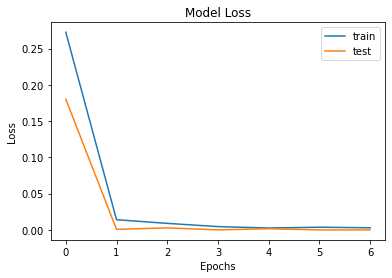

In [19]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

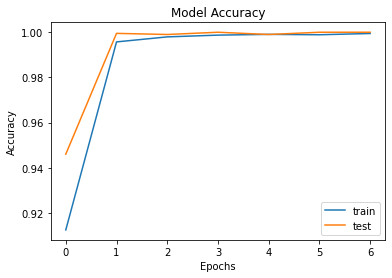

In [20]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# **Calculate loss and accuracy on test data**

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

2000/2000 [==============================] - 0s 81us/step
Test accuracy: 100.00%


## Confusion Matrix

In [22]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sn
# cat = [c[3:] for c in CATEGORIES]
# plt.figure(figsize=(5,5))
# cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))
# sn.heatmap(cm, annot=True,xticklabels=cat, yticklabels=cat)
# plt.plot()

# **F1 Score**

In [23]:
from sklearn.metrics import f1_score
f=f1_score(y_train,y_pred,average='weighted')
print("F1 Score - ",f)

NameError: name 'y_pred' is not defined

# **Precision Score**

In [ ]:
from sklearn.metrics import precision_score
p=precision_score(y_train, y_pred, average='weighted')
print("Precision Score - ",p)

# **Recall Score**

In [ ]:
from sklearn.metrics import recall_score
r=recall_score(y_train,y_pred,average='weighted')
print("Recall Score - ",r)